In the file **wpb_votes_list_2019.csv** you will find data about the votes within the Wroclaw Citizens' Budget, downloaded from the page [Wrocław Open Data](https://www.wroclaw.pl/open-data/dataset/wroclawski-budzet-obywatelski-glosowanie).

Read this data and filter it to get the following series:
1. Women under the age of 100
2. Men under the age of 100

Next, draw a cumulative plot showing how many people of a given age voted (broken down by gender).

>Hint: To generate the plot correctly, you need to ensure that both series are of the same length. To do so, use the `reindex` method with the `fill_value` option:
> `s_reindexed = s.reindex(range(0, 100), fill_value=0)`


After creating the plot, generate a table that displays this data below it. The table with the contents of the cells and the table with the description of the rows, should be generated using a loop:
```
cells = []
cellLabels = []
for i in range(0,100):
    cells.append([f'Number of female voters aged f{i}', f'Number of female voters aged f{i}'])
    cellLabels.append(f'{i}')
```
Of course, instead of the captions, the corresponding values should be shown.

Review the options in the [documentation](https://matplotlib.org/stable/api/table_api.html#matplotlib.table.Table.codes) – what parameters can be used to make the table more readable?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "../01_Data for plots/wpb_votes_list_2019.csv"
df = pd.read_csv(file_path, sep=',', encoding='utf-8')

In [4]:
df.head(5)

,No,Date,Age,Sex,Post_Code,Source,Local,General
0,1,"9:01:21, 20-09-2019",33,F,54-117,I,256,132
1,2,"9:01:32, 20-09-2019",38,F,54-131,I,323,255
2,3,"9:02:28, 20-09-2019",32,F,54-107,I,256,132
3,4,"9:02:44, 20-09-2019",36,M,53-339,I,4,5
4,5,"9:02:51, 20-09-2019",31,M,50-231,I,108,120


In [9]:
women = df[(df['Sex'] == 'F') & (df['Age'] < 100)]['Age'].value_counts().sort_index()
men = df[(df['Sex'] == 'M') & (df['Age'] < 100)]['Age'].value_counts().sort_index()

In [11]:
women = women.reindex(range(0, 100), fill_value=0).cumsum()
men = men.reindex(range(0, 100), fill_value=0).cumsum()

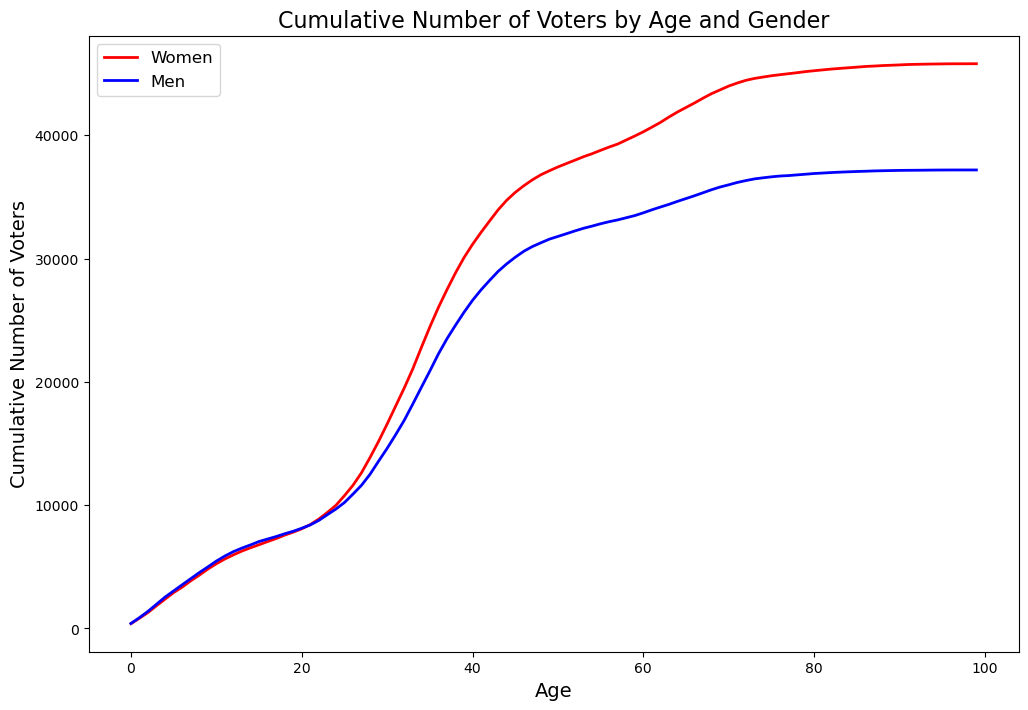

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(women.index, women.values, label='Women', color='red', linewidth=2)
plt.plot(men.index, men.values, label='Men', color='blue', linewidth=2)

plt.title('Cumulative Number of Voters by Age and Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cumulative Number of Voters', fontsize=14)
plt.legend(fontsize=12)

cells = []
cellLabels = []
for age in range(0, 100):
    cells.append([women[age], men[age]])
    cellLabels.append(f'{age}')

plt.table(cellText=cells,
          colLabels=['Women', 'Men'],
          rowLabels=cellLabels,
          cellLoc='center',
          loc='bottom',
          bbox=[0, -1.0, 1, 1.2])

plt.subplots_adjust(bottom=0.4)
plt.show()